In [8]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'bmkr.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())


   Year  Month  Crude Oil Price  Production  Crude Oil Export    EXGR
0  2010      1            77.62        2.33              1.88  150.33
1  2010      2            75.06        2.39              1.94  150.97
2  2010      3            80.27        2.44              1.99  150.08
3  2010      4            85.29        2.41              1.96  150.38
4  2010      5            77.54        2.41              1.96  151.49


Random Forest MSE: 2913.4934291273544
Random Forest R2: 0.880725642152022
Gradient Boosting MSE: 2182.3763496248175
Gradient Boosting R2: 0.9106565557753533


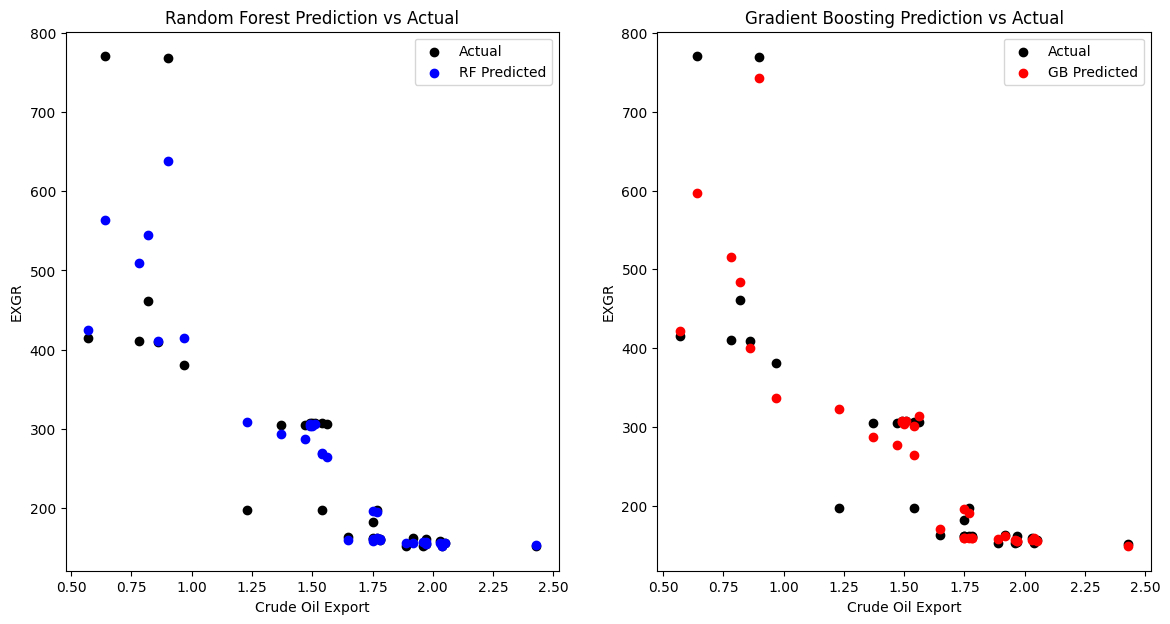

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features and Target
X = data[['Crude Oil Price', 'Production', 'Crude Oil Export']]  # Include all relevant features
y = data['EXGR']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Evaluate the models
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("Random Forest MSE:", rf_mse)
print("Random Forest R2:", rf_r2)
print("Gradient Boosting MSE:", gb_mse)
print("Gradient Boosting R2:", gb_r2)

# Plotting the results for visual comparison
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(X_test['Crude Oil Export'], y_test, color='black', label='Actual')
plt.scatter(X_test['Crude Oil Export'], rf_predictions, color='blue', label='RF Predicted')
plt.title('Random Forest Prediction vs Actual')
plt.xlabel('Crude Oil Export')
plt.ylabel('EXGR')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test['Crude Oil Export'], y_test, color='black', label='Actual')
plt.scatter(X_test['Crude Oil Export'], gb_predictions, color='red', label='GB Predicted')
plt.title('Gradient Boosting Prediction vs Actual')
plt.xlabel('Crude Oil Export')
plt.ylabel('EXGR')
plt.legend()

plt.show()



In [11]:
# Request user input for prediction
crude_oil_price = float(input("Enter the Crude Oil Price for prediction: "))
production = float(input("Enter the Production value for prediction: "))
crude_oil_export = float(input("Enter the Crude Oil Export value for prediction: "))

# Convert user input to the same format as X data
user_input_transformed = [[crude_oil_price, production, crude_oil_export]]  # As the model expects a 2D array

# Make predictions with the input
rf_prediction = rf_model.predict(user_input_transformed)
gb_prediction = gb_model.predict(user_input_transformed)

print(f"Random Forest Prediction of EXGR: {rf_prediction[0]}")
print(f"Gradient Boosting Prediction of EXGR: {gb_prediction[0]}")

Enter the Crude Oil Price for prediction: 8
Enter the Production value for prediction: 7
Enter the Crude Oil Export value for prediction: 9
Random Forest Prediction of EXGR: 196.60550000000006
Gradient Boosting Prediction of EXGR: 249.0786648037498


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle

# Assuming you've already loaded your data into the 'data' DataFrame
# Features and Target
X = data[['Crude Oil Price', 'Production', 'Crude Oil Export']]  # Include all relevant features
y = data['EXGR']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Save the models to a pickle file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

print("Models saved successfully!")

# Optionally, here's how you would load the models back from the pickle file
# with open('/mnt/data/random_forest_model.pkl', 'rb') as f:
#     loaded_rf_model = pickle.load(f)
# with open('/mnt/data/gradient_boosting_model.pkl', 'rb') as f:
#     loaded_gb_model = pickle.load(f)

# Make predictions (optional demonstration using the loaded models)
# rf_predictions = loaded_rf_model.predict(X_test)
# gb_predictions = loaded_gb_model.predict(X_test)

# Evaluate the models (optional demonstration using the loaded models)
# rf_mse = mean_squared_error(y_test, rf_predictions)
# rf_r2 = r2_score(y_test, rf_predictions)
# gb_mse = mean_squared_error(y_test, gb_predictions)
# gb_r2 = r2_score(y_test, gb_predictions)

# print("Loaded Random Forest MSE:", rf_mse)
# print("Loaded Random Forest R2:", rf_r2)
# print("Loaded Gradient Boosting MSE:", gb_mse)
# print("Loaded Gradient Boosting R2:", gb_r2)
